# Simple Linear Regression Neural Network Using Pytorch 

#### Install the necessary package 
#### recommend using a new conda environment
pip install torch==1.9.0 torchvision==0.10.0 torchaudio==0.9.0

In [3]:
# Verification of pytorch
import torch
print(torch.__version__)

1.9.0


In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

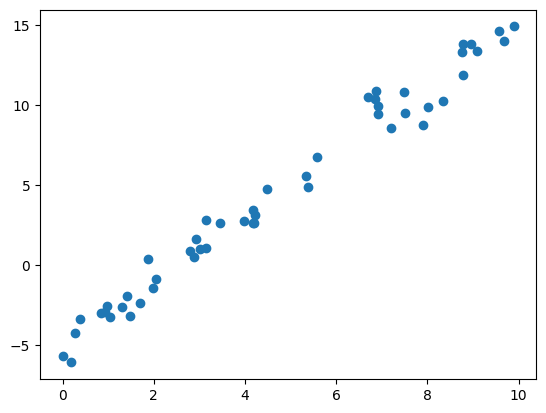

In [3]:
# Generate the dataset
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 5 + rng.randn(50)
plt.scatter(x, y);

In [4]:
# Convert numpy arrays to PyTorch tensors
x_tensor = torch.tensor(x, dtype=torch.float32).unsqueeze(1)
y_tensor = torch.tensor(y, dtype=torch.float32).unsqueeze(1)

In [5]:
# Define the neural network model
class SimpleLinearModel(nn.Module):
    def __init__(self):
        super(SimpleLinearModel, self).__init__()
        self.linear = nn.Linear(1, 1)  # Input and output are both one-dimensional

    def forward(self, x):
        return self.linear(x)

In [6]:
# Instantiate the model, define the loss function and the optimizer
model = SimpleLinearModel()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [9]:
# Training loop

num_epochs = 1000
loss_list = []
iteration_number = 0

for epoch in range(num_epochs):
    # Forward pass: Compute predicted y by passing x to the model
    y_pred = model(x_tensor)
    
    # Compute and print loss
    loss = criterion(y_pred, y_tensor)
    
    # Zero gradients, perform a backward pass, and update the weights
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Store loss value for plotting
    loss_list.append(loss.item())
    
    # Print loss every 50 iterations
    if (epoch + 1) % 50 == 0:
        print(f'Epoch {epoch + 1}, Loss: {loss.item():.4f}')

Epoch 50, Loss: 0.8184
Epoch 100, Loss: 0.8184
Epoch 150, Loss: 0.8184
Epoch 200, Loss: 0.8183
Epoch 250, Loss: 0.8183
Epoch 300, Loss: 0.8183
Epoch 350, Loss: 0.8183
Epoch 400, Loss: 0.8183
Epoch 450, Loss: 0.8183
Epoch 500, Loss: 0.8183
Epoch 550, Loss: 0.8183
Epoch 600, Loss: 0.8183
Epoch 650, Loss: 0.8183
Epoch 700, Loss: 0.8183
Epoch 750, Loss: 0.8183
Epoch 800, Loss: 0.8183
Epoch 850, Loss: 0.8183
Epoch 900, Loss: 0.8183
Epoch 950, Loss: 0.8183
Epoch 1000, Loss: 0.8183


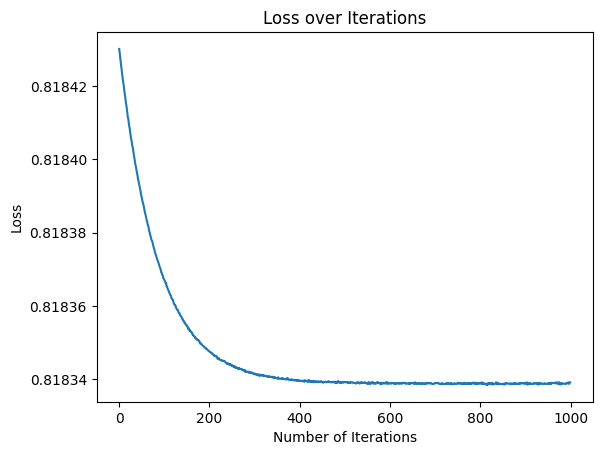

In [10]:
# Plot the loss over the iterations
plt.plot(range(num_epochs), loss_list)
plt.xlabel("Number of Iterations")
plt.ylabel("Loss")
plt.title("Loss over Iterations")
plt.show()

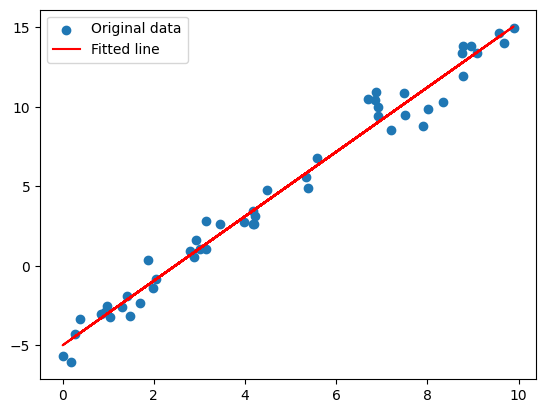

In [11]:
# Plot the original data and the fitted line
plt.scatter(x, y, label='Original data')
plt.plot(x, y_pred.detach().numpy(), label='Fitted line', color='red')
plt.legend()
plt.show()